### 학습목표
1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

In [1]:
import numpy as np
import pandas as pd
# seaborn
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

#### 데이터 로딩
1. 정제된 데이터 사용(retail.csv)

In [2]:
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}
retail = pd.read_csv('./OnlineRetailClean.csv', dtype=dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#### 날짜 타입 데이터 변환
 - 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이

In [3]:
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397924 non-null  int64         
 1   InvoiceNo      397924 non-null  int64         
 2   StockCode      397924 non-null  object        
 3   Description    397924 non-null  object        
 4   Quantity       397924 non-null  int32         
 5   InvoiceDate    397924 non-null  datetime64[ns]
 6   UnitPrice      397924 non-null  float32       
 7   CustomerID     397924 non-null  int32         
 8   Country        397924 non-null  object        
 9   CheckoutPrice  397924 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


#### 해당 기간 동안의 매출
 - 전체 매출
 - 국가별 매출
 - 월별 매출
 - 요일별 매출
 - 시간별 매출

#### 전체 매출

In [4]:
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

#### 국가별 매출

In [5]:
rev_by_countries = retail.groupby('Country').sum()
rev_by_countries

,Unnamed: 0,InvoiceNo,Quantity,UnitPrice,CustomerID,CheckoutPrice
Country,,,,,,
Australia,266455886,659118272,84209,3.612500e+03,1.475853e+07,138521.310
Austria,118301156,223822318,4881,1.693900e+03,4.982601e+06,10198.680
Bahrain,3144388,9397437,260,7.895000e+01,2.100270e+05,548.400
Belgium,561892335,1138462862,23237,7.372850e+03,2.524670e+07,41196.340
Brazil,5034064,17606432,356,1.426000e+02,4.086080e+05,1143.600
Canada,36331486,84252636,2763,9.105800e+02,2.615483e+06,3666.380
Channel Islands,190820428,417972473,9491,3.389650e+03,1.113834e+07,20450.440
Cyprus,145370145,341888568,6361,3.506180e+03,7.616904e+06,13590.380
Czech Republic,5389080,13876340,671,7.827000e+01,3.195250e+05,826.740


In [6]:
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

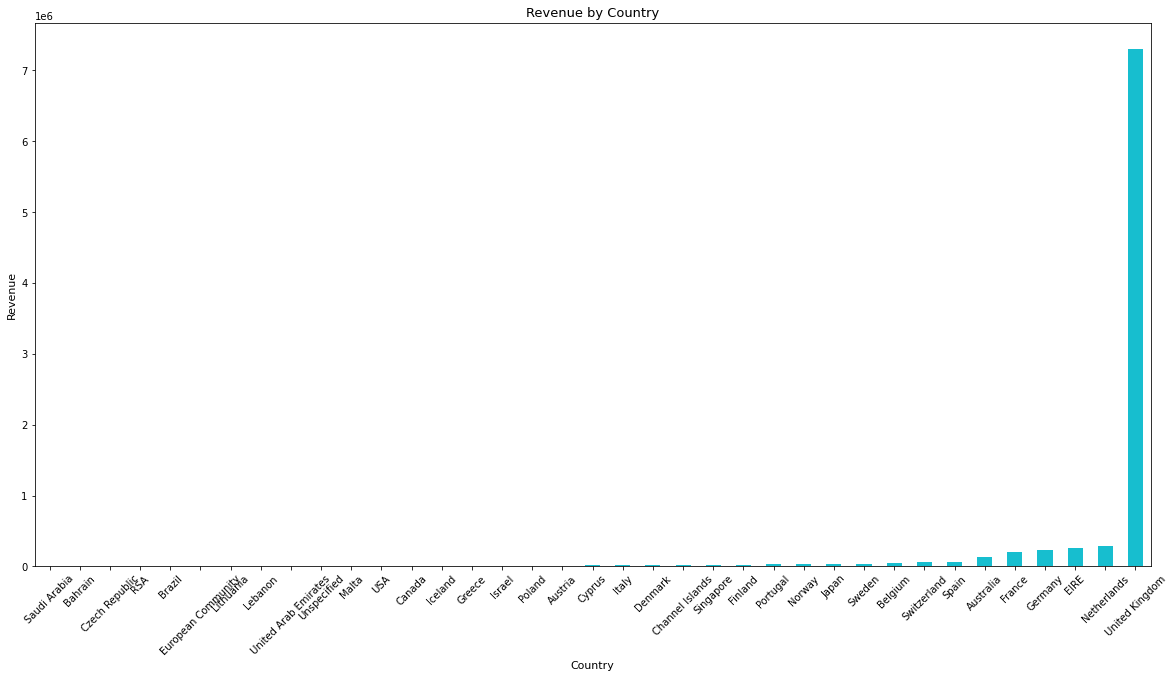

In [7]:
plot = rev_by_countries.plot(kind='bar',color=COLORS[-1], figsize=(20,10))
plot.set_xlabel('Country', fontsize = 11)
plot.set_ylabel('Revenue', fontsize = 11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

In [8]:
rev_by_countries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

#### 그래프 유틸 함수

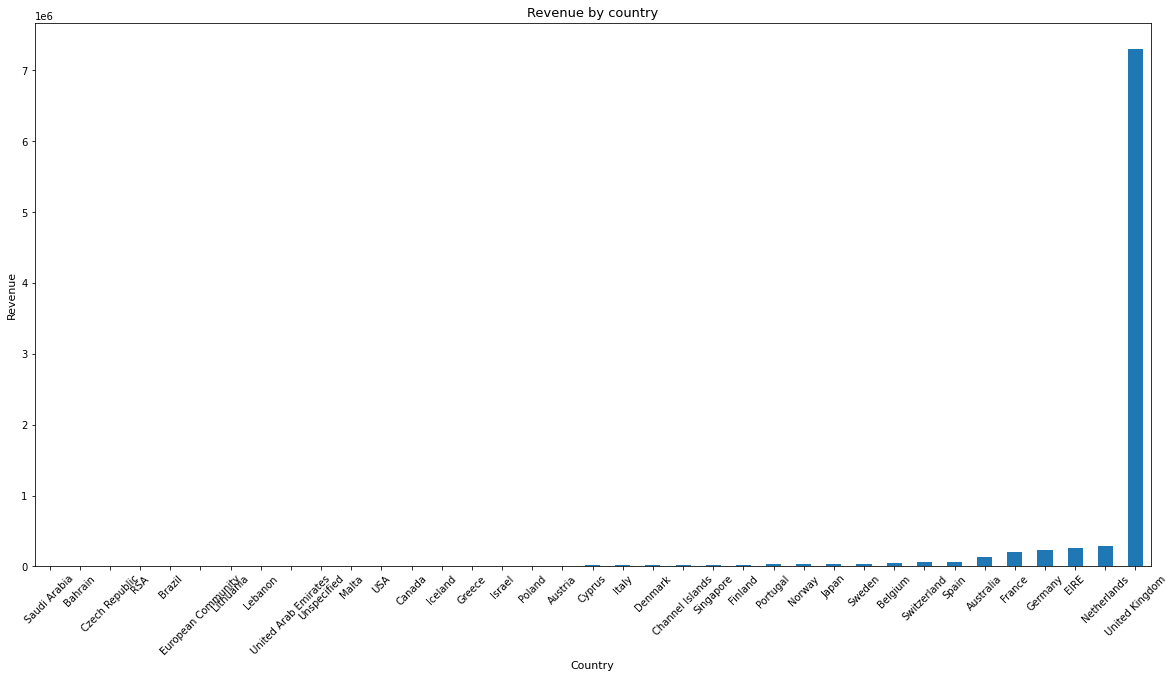

In [21]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20,10), rotation=45):
  plot = df.plot(kind='bar',color=color, figsize=figsize)
  plot.set_xlabel(xlabel, fontsize = 11)
  plot.set_ylabel(ylabel, fontsize = 11)
  plot.set_title(title, fontsize=13)
  plot.set_xticklabels(labels=df.index, rotation=rotation)

plot_bar(rev_by_countries, 'Country', 'Revenue', 'Revenue by country')

#### 월별 매출

In [18]:
retail.set_index('InvoiceDate') #원하는 컬럼으로 인덱스 만들기


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CheckoutPrice
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
2010-12-01 08:26:00,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
2010-12-01 08:26:00,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20
2011-12-09 12:50:00,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60
2011-12-09 12:50:00,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60


In [16]:
def extract_month(date):
    month = str(date.month)
    if date.month <10:
        month = '0' + month
    return str(date.year) + month

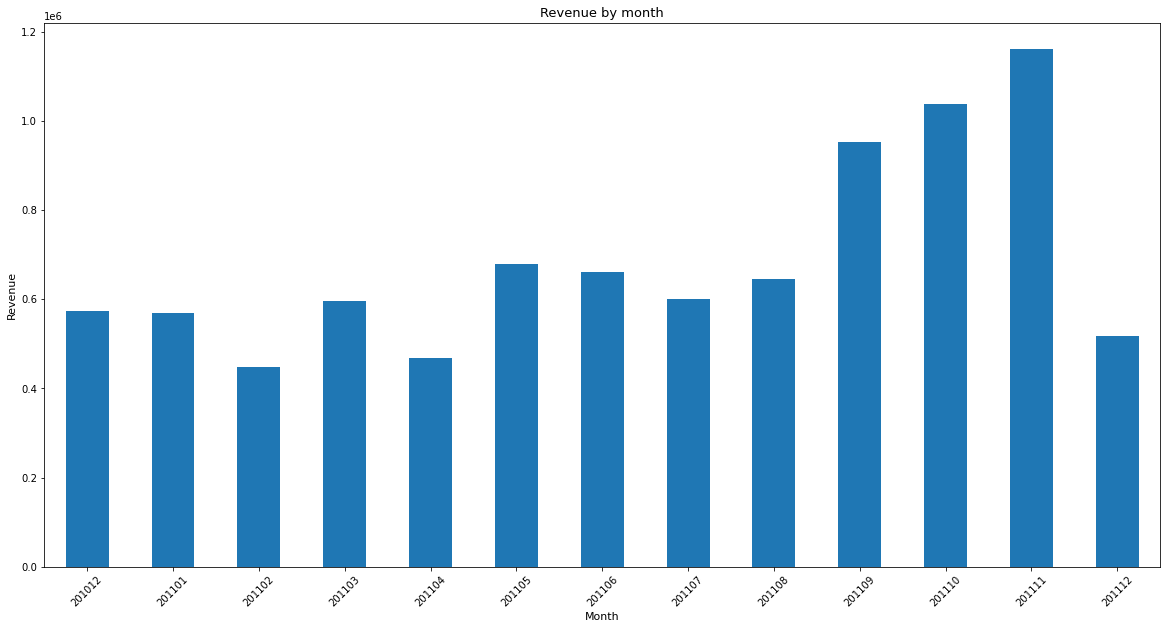

In [22]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by month')

In [24]:
#데이터 확인 --> 데이터가 2011년 12월 전체를 포함하고 있지 않음
retail['InvoiceDate'].sort_values(ascending=False)

397923   2011-12-09 12:50:00
397916   2011-12-09 12:50:00
397910   2011-12-09 12:50:00
397911   2011-12-09 12:50:00
397912   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397924, dtype: datetime64[ns]

#### 요일별 매출

In [30]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date: date.dayofweek).sum()['CheckoutPrice']
#date를 넣으면 dayofweek을 반환
#dayofweek은 pandas의 함수 중 하나로, 요일을 숫자로 return(월 : 0 ~ 일 : 6)
rev_by_dow 

#결과 확인해보니 토요일(5)에는 매출이 발생 안했네

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

In [35]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
rev_by_dowx

Mon     1367146.411
Tue     1700634.631
Wed     1588336.170
Thur    1976859.070
Fri     1485917.401
Sun      792514.221
Name: CheckoutPrice, dtype: float64

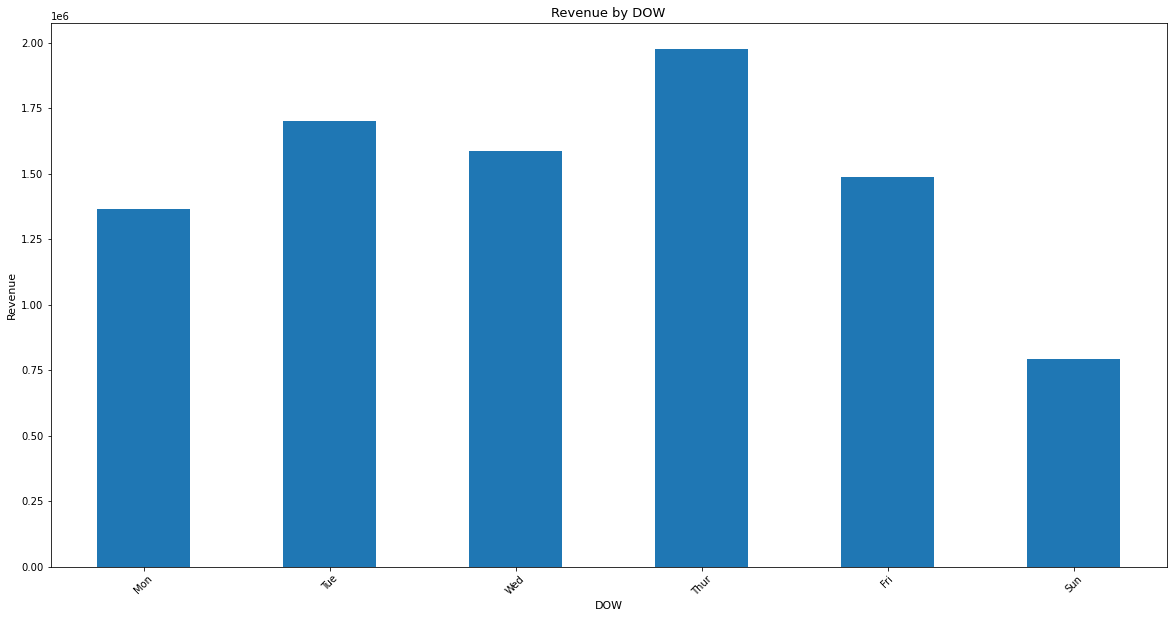

In [37]:
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

#### 시간별 매출

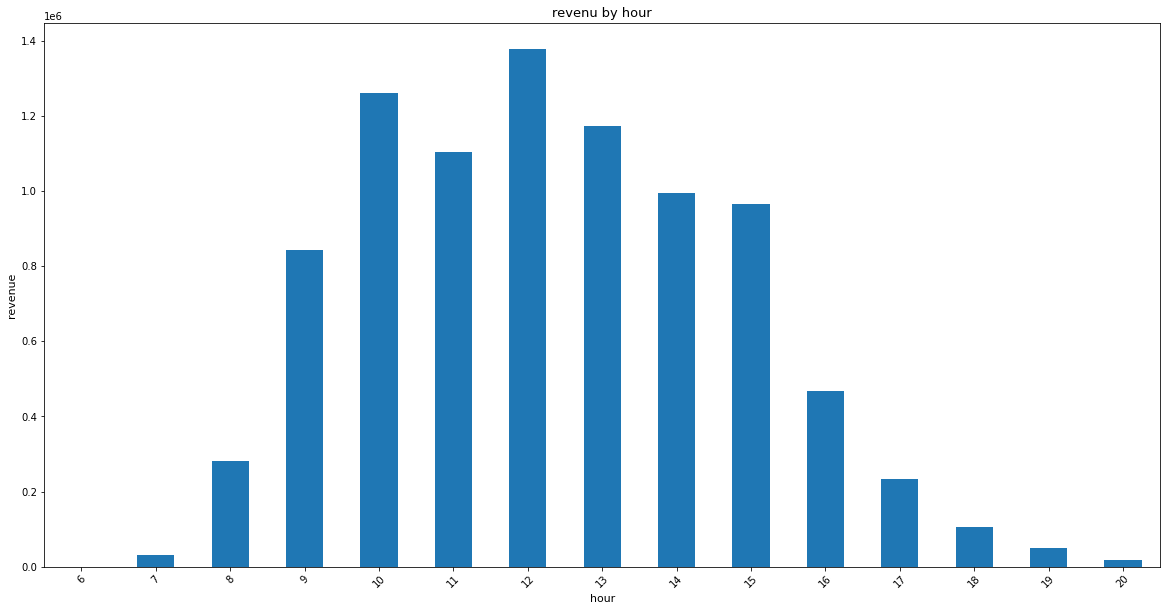

In [43]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date : date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, 'hour', 'revenue', 'revenu by hour')

#### 매출 데이터로부터 insight 
 - 전체 매출의 82%가 UK에서 발생
 - 11년도의 가장 많은 주문이 발생한 달 11월(12월의 전체 데이터가 반영이 되진 않았음)
  - 11, 12월의 판매량이 압도(블랙프라이데이, 사이버먼데이, 크리스마스 휴일)
 - 일주일중 목요일까지는 성장세를 보이다가, 이후로 하락(토요일에는 주문X)
 - 7시를 시작으로 주문이 시작되어 12시까지 증가세, 15시까지 하락을, 15시 이후 부터 급락)

#### 제품별 metrics
 - Top 10 판매 제품
 - Top 10 매출 제품

In [46]:
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [52]:
top_selling = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:3]
top_selling

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
Name: CheckoutPrice, dtype: float64

#### top 3 아이템의 월별 판매량 추이

In [53]:
retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling.index]

Quantity  CheckoutPrice
StockCode InvoiceDate                         
23843     201112          80995      168469.60
22423     201012           1580       17756.70
          201101            946       10765.50
          201102            839        9559.65
          201103           1296       14797.40
          201104           1098       12721.50
          201105            996       11503.60
          201106            712        8229.10
          201107           1076       12225.00
          201108            775        8934.45
          201109            730        8570.13
          201110           1028       11920.65
          201111            944       11064.24
          201112            392        4545.03
85123A    201012           3611        9602.05
          201101           5467       14979.75
          201102           1823        4912.65
          201103           1918        5262.50
          201104           3725        9581.65
          201105           3846       10700.42
          201106           1618        4401.90
          201107           2971        8303.97
          201108           2046        5498.10
          201109           2444        6789.00
          201110           1650        4564.54
          201111           4861       13855.83
          201112            802        2151.14

In [54]:
monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling.index]

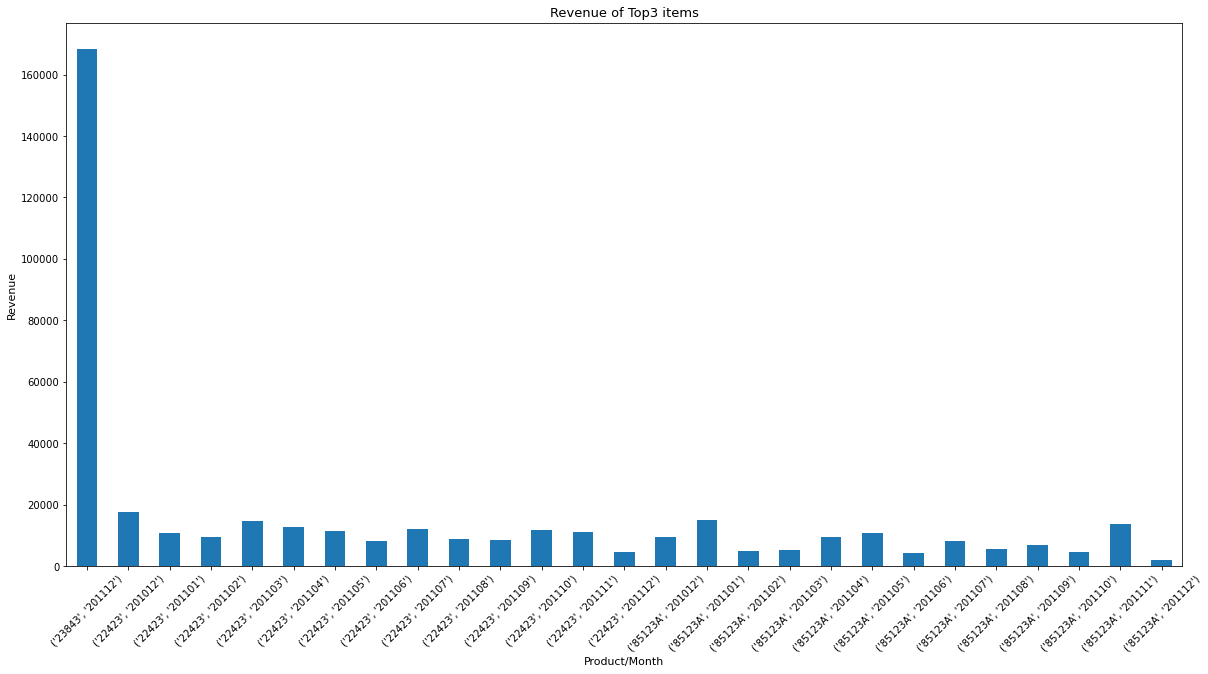

In [55]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/Month', 'Revenue', 'Revenue of Top3 items')